### I Q Σήματα - Ορθογωνική και Συμφασική Συνιστώσα 

Στα συστήματα επικοινωνιών η μετάδοση της πληροφορίας γίνεται με διαμόρφωση των χαρακτηριστικών ενός φέροντος κύματος. Προκύπτει έτσι ένα σήμα που το φασματικό του περιεχόμενο είναι μη αμελητέο σε μια περιοχή συχνοτήτων έυρους 2W γύρω από τη θετική και αρνητική συχνότητα fc του φέροντος κύματος. Το σήμα αυτό λεγεται και ζωνοπερατό σήμα ή σήμα ζώνης διέλευσης (band-pass). 

Ένα τέτοιο σήμα g(t) μπορεί να περιγραφεί με τη σχέση:

$$
{\displaystyle g(t)=a(t)\cos(2\pi f_c t+ \phi (t))}
$$

To a(t) είναι το πλάτος της περιβάλλουσας του σήματος και το φ(t) η φάση του.

Τα ημιτονοειδή σήματα συνήθως αναπαριστάνται με τη μορφή φασιθέτη. Αυτός είναι ένας μιγαδικός αριθμός που σε πολική μορφή το μέτρο του είναι ίσο με το πλάτος και το όρισμα ίσο με τη φάση. 

Το πραγματικό σήμα g(t) είναι το πραγματικό μέρος του μιγαδικού.

$$
g(t) = Re \{\hat{g}(t)\} = Re \{ a(t)exp(2\pi f_c t + \phi (t))\}
$$

Η αναπαράσταση με μιγαδική μορφή $\hat{g}(t)=a(t)exp(2\pi f_c t + \phi (t))$ είναι πιο κατάλληλη για την περεταίρω επεξεργασία του σήματος.

Εναλλακτικά το σήμα με βάση το νόμο αθροίσματος συνημιτόνων $cos(A+B)=cosAcosB-sinAsinB$ το σήμα g(t) μπορεί να γραφεί:

$$
g(t) =  a(t)cos(\phi (t))cos(2\pi f_c t) - a(t)sin(\phi (t))sin(2\pi f_c t) = I(t)cos(2\pi f_c t) - Q(t)sin(2\pi f_c t)
$$

όπου
$$
I(t) = a(t)cos(\phi (t))  \\
Q(t)=a(t)sin(\phi (t))
$$

Το σήμα μπορεί να γραφτεί δηλαδή με τη βοήθεια των δύο σημάτων, της συμφασικής συνιστώσας Ι(t) και της ορθογωνικής συνιστώσας. Οι συνιστώσες αυτές δεν εξαρτώνται από τη συχνότητα του φέροντος και χαρακτηρίζουν το πλάτος και τη φάση του σήματος.

Η περιγραφή αυτή δίνει τη δυνατότητα σύνθεσης του διαμορφωμένου κατά φάση ή και γωνία εκπεμπόμενου σήματος με βάση τις δύο ορθογωνικές συνιστώσες.

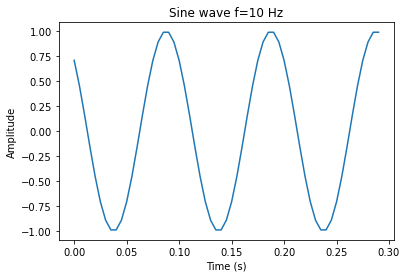

In [21]:
import numpy as np
import matplotlib.pyplot as plt
    
f=10; #frequency in Hz
fs = 20*f # sampling frequency
nCyl = 3 # number of cycles of sine wave to generate
t = np.arange(0,nCyl*1/f-1/fs,1/fs) # time base
A = 1 # amplitude
phase = (1/4)*np.pi; #initial phase

s1 = A*np.cos(2*np.pi*f*t+phase)

plt.plot(t,s1) # plot using pyplot library from matplotlib package
plt.title('Sine wave f='+str(f)+' Hz') # plot title
plt.xlabel('Time (s)') # x-axis label
plt.ylabel('Amplitude') # y-axis label
plt.show() # display the figure

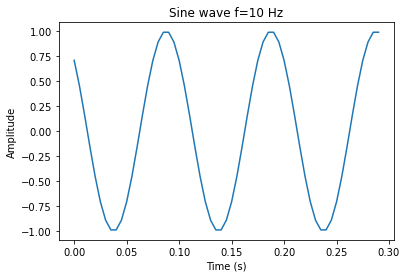

In [22]:
#Now make the signal with constant I,Q

I = A*np.cos((1/4)*np.pi)

Q = A*np.sin((1/4)*np.pi)

c1 = np.cos(2*np.pi*f*t)

c2 = np.sin(2*np.pi*f*t)

s2 = I*c1 - Q*c2

plt.plot(t,s2) # plot using pyplot library from matplotlib package
plt.title('Sine wave f='+str(f)+' Hz') # plot title
plt.xlabel('Time (s)') # x-axis label
plt.ylabel('Amplitude') # y-axis label
plt.show() # display the figure

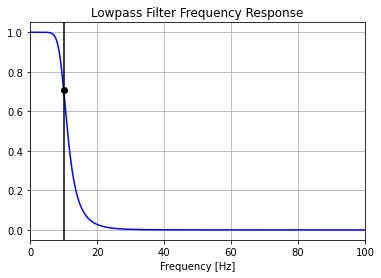

In [26]:
#Now we will recover the I and Q components

from scipy.signal import butter, lfilter, freqz

order = 5

sampling_freq = fs

cutoff_freq = 10

#sampling_duration = 5

#number_of_samples = sampling_freq * sampling_duration

#time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)

signal_I = s2 * c1

signal_Q = s2 * c2

normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq

numerator_coeffs, denominator_coeffs = butter(order, normalized_cutoff_freq)

# Plot the frequency response.
w, h = freqz(numerator_coeffs, denominator_coeffs, worN=8000)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff_freq, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff_freq, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

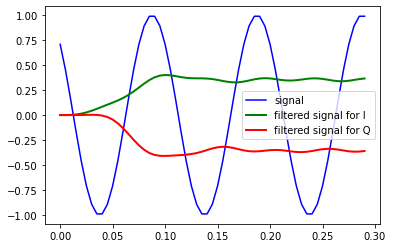

In [27]:
filtered_signal_I = lfilter(numerator_coeffs, denominator_coeffs, signal_I)

filtered_signal_Q = lfilter(numerator_coeffs, denominator_coeffs, signal_Q)

plt.plot(t, signal, 'b-', label='signal')
plt.plot(t, filtered_signal_I, 'g-', linewidth=2, label='filtered signal for I')
plt.plot(t, filtered_signal_Q, 'r-', linewidth=2, label='filtered signal for Q')
plt.legend()

Με τη μορφή φασιθέτη το σήμα g(t) περιγράφεται ως
$$
\hat{g}(t)=a(t)exp(2\pi f_c t + \phi (t)) = (a(t)exp(\phi (t)))exp(2\pi f_c t)=\tilde{g}(t)exp(2\pi f_c t)
$$

όπου
$$
\tilde{g}(t) = Ι(t) + jQ(t) = a(t)exp(\phi (t))
$$

Το σήμα αυτό είναι η μιγαδική περιβάλλουσα του σήματος. Το φασματικό της περιεχόμενο ως μιγαδικό σήμα είναι μη συμμετρικό και περί τη βασική ζώνη, καθόσον δεν εξαρτάται από το φέρον σήμα.

Με βάση τη σχέση που δίνει το πραγματικό μέρος ενός μιγαδικού ως το ημιάθροισμα του μιγαδικού με το συζυγή του

$$
g(t) = \frac{1}{2} ( \hat{g}(t) + \hat{g}*(t)) = \frac{1}{2} ( \tilde{g}(t)exp(j2\pi f_c) + \tilde{g}*(t)exp(-j2\pi f_c))
$$

και με βάση τις ιδιότητες του μετασχηματισμού Fourier προκύπτει ότι αν G(f) είναι το φάσμα του σήματος g(t) και $\tilde{G}(f)$ το φάσμα της μιγαδικής περιβάλλουσας, τότε

$$
G(f) = \frac{1}{2} ( \tilde{G}(f-f_c) + \tilde{G}*(-f-f_c))
$$

Αυτό σημαίνει ότι το δίπλευρο φάσμα G(f) προκύπτει από το φάσμα της μιγαδικής περιβάλλουσας με μεταφορά στη συχνότητα του φέροντος προς τα θετικά και με αντιστροφή προς τα αρνητικά. Άρα το φάσμα της μιγαδικής περιβάλλουσας είναι βασικής ζώνης, μη συμμετρικό και περιλαμβάνει όλη την πληροφορία του φάσματος του ζωνοπερατού σήματος.

Αυτή η δυνατότητα απάλοιψης της περίσσιας πληροφορίας στο δίπλευρο φάσμα με την υποχρέωση αναπαράστασης ωστόσο του πραγνατικού σήματος με το μιγαδικό του βασικής ζώνης, δίνει τη βάση για την έννοια του αναλυτικού σήματος.

### Αναλυτικό Σήμα
Αναλυτικό είναι το μιγαδικό σήμα που αποτελεί επέκταση ενός πραγματικού στον πραγματικό άξονα και το φασματικό του περιεχόμενο δεν περιλαμβάμει αρνητικές συχνότητες. Επειδή το σήμα είναι μιγαδικό δεν παρουσιάζει τη φασματική συμμετρία του πραγματικού.

Δεδομένου ενός πραγματικού σήματος, το μιγαδικό αναλυτικό του σήμα μπορεί να προκύψει αν θεωρηθεί το σήμα με πραγματικό μέρος το πραγματικό σήμα και φανταστικό το μετασχηματισμένο κατά Hilbert αυτού.